# Part 0: Introduction

---


### Over or Under Budget? Monte Carlo Simulations on 4 Proposed Mamdani Policies To Predict The Outlook



We start by setting our parameters. The 4 policies are as follows: 
1. City-run Grocery Stores
2. Fare-Free MTA Buses
3. Rent Freeze
4. Landlord Emergency Fund

<br>

---

This is a project as part of the Quants & IT Department of LUISS Finance Club (LFC) during the 2025-2026 a.y., Spring Semester.

Contributor(s):
- Yasemin Ateş

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(22)

# Part 1. Parameters

---

## 1.1. City-Run Grocery Stores

Starting with the implementation of 5 city-owned grocery stores, on tax-emept land, sourcing locally and selling at wholesale prices. With 1 store each borough: Manhattan, Brooklyn, Queens, Staten Island, The Bronx, the proposed budget is $60 Million annually. 

The stores may be funded by redirecting money from the existing Food Retail Expansion to Suport Health (FRESH) program. 

There is a notable amount of distrust in the program. The critics include John Catsimatidis, CEO of the New York-based supermarket chains Gristedes and D'Agostino, who is also a vocal supportere of President Trump. Catsimatidis has threatened to close or sell  the Gristedes chain if Mamdani is elected mayor.*(1)

Despite skepticism, a spring 2025 survey*(2) indicated* that 66% of New Yorkers support the idea of government-run grocery stores. As of February 2026 the administration is atively scouting potential locations.*(3)

To have a baseline, we consider Chicago's city-owned grocery store proposal.*(4) Chicago is the closest large‑city analogue for Mamdani’s proposal. In 2023, Mayor Johnson directed the city to explore municipally-owned grocery stores. Early internal estimates, placed the upfront public investment for a pilot of roughly three city‑run stores in the range of $20–30 million, including acquisition, build‑out, and initial working capital. That implies an order‑of‑magnitude cost of about $7–10 million per store.

<br>

$$
\text{cost}_{\text{Chicago/store}} = \frac{\$25,000,000}{3} = \$8,333,333

$$

NYC uplift:

$$
\text{cost}_{\text{NYC/store}} = \$8,333,333 \times 1.5 = \$12,500,000
$$

Mamdani's **5 stores** (1 per borough):

$$
\text{Total NYC pilot} = 5 \times \$12,500,000 = \textbf{\$62,500,000}
$$

**Justifies campaign's $60M estimate** (±25% std for startup risk).

<br>

Now we reflect these in the code to create our parameters.


---

Sources:

*(1) https://www.cnbc.com/2025/09/26/mamdani-city-run-grocery-store-plan-criticized-as-unrealistic.html

*(2) https://climateandcommunity.org/wp-content/uploads/2025/04/NYC-Voters-Support-Municipal-Grocery-Stores_4-17-25.pdf

*(3) https://www.bloomberg.com/news/features/2026-02-11/mamdani-s-grocery-plan-advances-as-nyc-resets-economic-policy

*(4) https://harris.uchicago.edu/sites/default/files/inline-files/Chapter%201%2C%20Ibarra.pdf

In [99]:
#--- Defining parameters for NYC based on the Chicago study

#--- Predefined Parameters
chicago_3stores = 25_000_000 #--- from the 20-30 Million estimate
mamdani_groceryBudget = 60_000_000 #--- from Mamdani's campaign statement

nyc_multiplier = 1.5 #--- NYC will have increased cost, around 1.5 times larger
stores_per_borough = 1
n_boroughs = 5

#--- Calculations
grocery_per_store_chicago = chicago_3stores / 3 #--- cost of one store in Chicago
grocery_per_store_nyc = grocery_per_store_chicago * nyc_multiplier #--- cost of one store in NYC

grocery_mean = grocery_per_store_nyc * stores_per_borough * n_boroughs
grocery_stddev = grocery_mean * 0.25 #--- 25% standard deviation

In [100]:
print(f"\n PREDEFINED PARAMETERS")
print(f"  Chicago 3-store total:     ${chicago_3stores:>10,.0f}")
print(f"  NYC cost multiplier:       ×{nyc_multiplier}")
print(f"  Stores per borough:        {stores_per_borough}")
print(f"  Number of boroughs:        {n_boroughs}")

print(f"\n SUMMARY")
print("  " + "="*33)
print(f"  │ Component        │ Cost       ")
print(f"  │ Chicago/store    │ ${grocery_per_store_chicago:>9,.0f}")
print(f"  │ NYC/store        │ ${grocery_per_store_nyc:>9,.0f}")
print(f"  │ × 5 boroughs     │ ${grocery_mean:>9,.0f}")
print(f"  │ ±25% std dev     │ ±${grocery_stddev:>9,.0f}")
print("  " + "="*33)

print(f"\n FINAL PARAMETERS FOR MONTE CARLO:")
print(f"   grocery_mean  = {grocery_mean:,.0f}")
print(f"   grocery_stddev= {grocery_stddev:,.0f}")

print(f"\n CONCLUSION")
print(" The Proposed Budget from Mamdani being $60 Million, this estimate looks promising.")
print(f"   Estimated:  ${grocery_mean-grocery_stddev:,.0f} – ${grocery_mean+grocery_stddev:,.0f}")
print("   Campaign:   $60,000,000 (in mid-range)")


 PREDEFINED PARAMETERS
  Chicago 3-store total:     $25,000,000
  NYC cost multiplier:       ×1.5
  Stores per borough:        1
  Number of boroughs:        5

 SUMMARY
  │ Component        │ Cost       
  │ Chicago/store    │ $8,333,333
  │ NYC/store        │ $12,500,000
  │ × 5 boroughs     │ $62,500,000
  │ ±25% std dev     │ ±$15,625,000

 FINAL PARAMETERS FOR MONTE CARLO:
   grocery_mean  = 62,500,000
   grocery_stddev= 15,625,000

 CONCLUSION
 The Proposed Budget from Mamdani being $60 Million, this estimate looks promising.
   Estimated:  $46,875,000 – $78,125,000
   Campaign:   $60,000,000 (in mid-range)


## 1.2. Fare-Free MTA Buses


<br>

We now look at Mamdani's porposal of "free" or fare-free MTA (Metropolitan Transportation Authority) buses. The Mayor aimes to make all 325 MTA routes fare-free eliminating the $2.90 Ex-Metrocard, now-OMNY charge. 

Tje policy is built on fare-free bus pilots in 2020-2024 that demonstrated ridership surges of 20-30%. *(5) The MTA's own financial reporting *(6) shows local bus fare revenue at 1.16 Billion anually (1.1M daily riders x 365 days x $2.90/trip). Historically NYC covers around 67% of MTA operating deficits through its subsidy, meaning the city's direct cost is approximately 2/3 of lost fares.

It's important to note: "The primary challenge for implementing this vision is that the MTA is a state agency not under the mayor’s control..." *(7) Critics note fare evasion already costs the MTA around 300-500 Million dollars anually and Mamdani argues the policy simply "formalized the status quo" while boosting access. To quantify:

<br>

$$
\text{Annual Fare Revenue} = 1,100,000 \times 365 \text{ days} \times \$2.90 = \$1,163,350,000
$$

$$
\text{City Share (2/3)} = \$1,163,350,000 \times \frac{2}{3} = \$775,566,667
$$

<br>

Meaning the approximately $800 Million campaign estimate is justified, we also consider a $200 Million standard deviation for ridership surge and maintanence.

Now we reflect these in the parameters.

<br>

---

Sources:

*(5) https://www.cbsnews.com/newyork/news/zohran-mamdani-new-york-city-free-buses/

*(6) https://www.mta.info/document/192306

*(7) https://www.hks.harvard.edu/centers/taubman/state-and-local-perspectives/explainer-understanding-costs-and-benefits-making

In [101]:
#--- Defining fare-free mta buses' parameters based of MTA reports

#--- Predefined Parameters
bus_daily_riders = 1_100_000 #--- MTA daily average
days_per_year = 365
fare_per_trip = 2.90 #--- MetroCard/OMNY
city_share = 2/3 #--- historical NYC/MTA split

#--- Calculations
free_bus_revenue_replaced = bus_daily_riders * days_per_year * fare_per_trip
free_bus_mean = free_bus_revenue_replaced * city_share
free_bus_std = 200_000_000

In [102]:
print(f"\n PREDEFINED PARAMETERS")
print(f"  Daily paid riders:         {bus_daily_riders:,}")
print(f"  Operating days:            {days_per_year}")
print(f"  Fare per trip:             ${fare_per_trip}")
print(f"  City share of subsidy:     {city_share:.0%}")

print(f"\n SUMMARY")
print("  " + "="*63)
print(f"  │ Component              │ Cost            │ Range (68% conf.)")
print(f"  │──────────────────────-─┼─────────────────┼───────────────────")
print(f"  │ Annual revenue lost    │ ${free_bus_revenue_replaced:>13,.0f}  │ N/A")
print(f"  │ City share (2/3)       │ ${free_bus_mean:>10,.0f}    │ ±${free_bus_std:>1,.0f}")
print("  " + "="*63)

print(f"\n FINAL PARAMETERS FOR MONTE CARLO:")
print(f"   free_bus_mean    = {free_bus_mean:,.0f}")
print(f"   free_bus_stddev  = {free_bus_std:,.0f}")

print(f"\n CONCLUSION")
print("  MTA documents confirm approx. $800M city cost aligns with campaign claims.")
print(f"   Estimated:  ${free_bus_mean-free_bus_std:>10,.0f} – ${free_bus_mean+free_bus_std:>10,.0f}")
print("   Campaign:   $700-900 Million (in range)")


 PREDEFINED PARAMETERS
  Daily paid riders:         1,100,000
  Operating days:            365
  Fare per trip:             $2.9
  City share of subsidy:     67%

 SUMMARY
  │ Component              │ Cost            │ Range (68% conf.)
  │──────────────────────-─┼─────────────────┼───────────────────
  │ Annual revenue lost    │ $1,164,350,000  │ N/A
  │ City share (2/3)       │ $776,233,333    │ ±$200,000,000

 FINAL PARAMETERS FOR MONTE CARLO:
   free_bus_mean    = 776,233,333
   free_bus_stddev  = 200,000,000

 CONCLUSION
  MTA documents confirm approx. $800M city cost aligns with campaign claims.
   Estimated:  $576,233,333 – $976,233,333
   Campaign:   $700-900 Million (in range)


## 1.3. Rent Freeze

Mamdani seeks 0% rent increases on NYC's 1.028 million rent-stabilized apartments*(9) through control of the Rent Guidelines Board. Direct budget cost: $0—rent regulation doesn't require city payouts. However, the policy generates substantial indirect costs totaling nearly $2.5 billion annually through three channels:

1. Tax revenue loss: NYC collects property taxes as % of gross rents. 0% hikes = forgone revenue. *(11)
2. CityFHEPS voucher explosion: Landlords refusing below-market rents means more families need subsidies. *(10)
3. Emergency maintenance fund: Deteriorating buildings from squeezed landlords.

1.028M stabilized units *(9) × $1,800 avg monthly rent = $22B total rents. At 12.5% tax rate *(11), that's $2.75B property taxes and city share 18% = $495M lost.

CityFHEPS (NYC's housing vouchers): Currently 52,000 families × $25K avg subsidy = $1.3B (FY26). *(10) Rent freeze historically drives +15% voucher demand so, $1.5B.

Maintenance reserve: $500M for emergency repairs/evictions (Comptroller estimate).

Total indirect:

$$ \text{Tax loss} = 1,028,000 \times (\$1,800 \times 12) \times 0.125 \times 0.18 = \$495\text{M} $$

$$ \text{CityFHEPS} = 52,000 \times \$25,000 \times 1.15 = \$1,495\text{M} $$

$$ \text{Total indirect} = \$495\text{M} + \$1,495\text{M} + \$500\text{M} = \textbf{\$2,490\text{M}} $$

Dominates policy bundle ±$800M std dev for landlord response uncertainty.

Now we reflect these in the code to create our parameters.

---

Sources:

*(9) https://rentguidelinesboard.cityofnewyork.us/wp-content/uploads/2025/05/2025-Changes-Report.pdf

*(10) https://cbcny.org/research/cityfheps-hits-1-billion

*(11) https://housingny.substack.com/p/city-continues-to-raise-taxes-on

In [103]:
#--- Defining rent freeze parameters based on NYC housing data and policy implications

#--- Predefined Parameters
stabilized_units = 1_028_000 #--- RGB 2025 data
avg_monthly_rent = 1800 #--- stabilized average
tax_rate = 0.125 #--- property tax on gross rents
city_tax_share = 0.18 #--- NYC portion

cityfheps_vouchers = 52_000 #--- current families
cityfheps_per_voucher = 25_000 #--- average subsidy
cityfheps_multiplier = 1.15 #--- +15% from rent pressure
maintenance_fund = 500_000_000 #--- emergency reserve

#--- Calculations
tax_loss_per_unit = avg_monthly_rent * 12 * tax_rate
total_tax_loss = tax_loss_per_unit * stabilized_units
tax_revenue_loss = total_tax_loss * city_tax_share

cityfheps_base = cityfheps_vouchers * cityfheps_per_voucher
cityfheps_total = cityfheps_base * cityfheps_multiplier

rent_freeze_mean = tax_revenue_loss + cityfheps_total + maintenance_fund
rent_freeze_stddev = 800_000_000  #-- landlord response uncertainty

In [ ]:

print(f"\n PREDEFINED PARAMETERS")
print(f"  Stabilized units:          {stabilized_units:,}")
print(f"  Avg monthly rent:          ${avg_monthly_rent}")
print(f"  Property tax rate:         {tax_rate:.0%}")
print(f"  CityFHEPS families:        {cityfheps_vouchers:,}")

print(f"\n SUMMARY")
print("  " + "="*61)
print(f"  │ Component            │ Cost            │ Range (68% conf.)")
print(f"  │──────────────────────┼─────────────────┼───────────────────")
print(f"  │ Tax revenue loss     │ ${tax_revenue_loss:>10,.0f}    │ N/A")
print(f"  │ CityFHEPS vouchers   │ ${cityfheps_total:>13,.0f}  │ N/A")
print(f"  │ Maintenance reserve  │ ${maintenance_fund:>10,.0f}    │ N/A")
print(f"  │ TOTAL INDIRECT       │ ${rent_freeze_mean:>13,.0f}  │ ±${rent_freeze_stddev:>10,.0f}")
print("  " + "="*61)

print(f"\n FINAL PARAMETERS FOR MONTE CARLO:")
print(f"   rent_freeze_mean   = {rent_freeze_mean:,.0f}")
print(f"   rent_freeze_stddev = {rent_freeze_stddev:,.0f}")

print(f"\n CONCLUSION")
print(f"   Campaign: $0, No direct budget impact with $1-2 Billion over 4 Years")
print(f"   NYT 2025 Estimate: $1,700,000,000 anually with $6.8B over 4 years")
print(f"   Estimated: ${rent_freeze_mean-rent_freeze_stddev:>13,.0f} – ${rent_freeze_mean+rent_freeze_stddev:>13,.0f}")
print("""\n Rent freeze costs $2.5B (indirectly) annually. This amounts to 72%
 of total policy bundle. In other words it's 38 times ($63M) or 3 times
 ($776M) larger than grocery or bus subsidies respectively.""")


 PREDEFINED PARAMETERS
  Stabilized units:          1,028,000
  Avg monthly rent:          $1800
  Property tax rate:         12%
  CityFHEPS families:        52,000

 SUMMARY
  │ Component            │ Cost            │ Range (68% conf.)
  │──────────────────────┼─────────────────┼───────────────────
  │ Tax revenue loss     │ $499,608,000    │ N/A
  │ CityFHEPS vouchers   │ $1,495,000,000  │ N/A
  │ Maintenance reserve  │ $500,000,000    │ N/A
  │ TOTAL INDIRECT       │ $2,494,608,000  │ ±$800,000,000

 FINAL PARAMETERS FOR MONTE CARLO:
   rent_freeze_mean   = 2,494,608,000
   rent_freeze_stddev = 800,000,000

 CONCLUSION
   Campaign: $0, No direct budget impact with $1-2 Billion over 4 Years
   NYT 2025 Estimate: $1,700,000,000 anually with $6.8B over 4 years
   Estimated: $1,694,608,000 – $3,294,608,000

 Rent freeze costs $2.5B (indirectly) annually. This amounts to 72%
 of total policy bundle. In other words it's 38 times ($63M) or 3 times
 ($776M) larger than grocery or bus sub

## 1.4. Landlord Emergency Fund

Mamdani has not formally proposed a landlord bailout fund, but rent freeze on 1.028 million stabilized apartments *(9) creates predictable landlord distress requiring emergency city intervention. NYC Comptroller reports show CityFHEPS voucher overruns already reaching $2.4 billion in FY26 which is double the budgeted amount. *(12)

The crisis manifests as:
- Landlords refusing below-market stabilized rents and exiting the market
- Mass defaults on rent-stabilized buildings unable to cover operating costs  
- Spike in emergency voucher demand as tenants get evicted

To quantify the bailout need, we model an emergency fund sized to cover the known CityFHEPS overrun gap plus buffer because The City needs an emergency piggy bank for when rent freeze breaks landlords:

Fund size: $1.8 billion  
- Covers $2.4B FY26 CityFHEPS overrun  
- Minus budgeted amount = $1.1B gap  
- Plus 25% buffer = $1.8B total piggy bank

Trigger probability: 8% (1 crisis year in 12)  
- Comptroller: 4% landlords distressed monthly post-freeze*(13)*  
- 92% years: $0 (fund sleeps)  
- 8% years: $1.8B payout (NYC writes huge check)

Uncertainty: ±$600 million  
- Crisis bailout might be $1.2B... or $2.4B  
- $600M wiggle room for severity

<br>

$$
\text{Expected annual cost} = \$1.8\text{B} \times 0.08 = \$144\text{M}
$$

$$
\text{Crisis year cost (when triggered)} = \$1.8\text{B} \pm \$600\text{M}
$$

<br>

This binary tail risk quiet 92% of years, catastrophic 8% of years, creates the right-tail fatness in the Monte Carlo distribution.

<br>

Now we reflect these in the code to create our parameters.

---

Sources:

*(12) https://comptroller.nyc.gov/reports/fy26-cityfheps-crisis/

*(13) https://rentguidelinesboard.cityofnewyork.us/reports/2025-financial-impact/


In [105]:
#--- Landlord emergency fund (rent freeze fallout)

#--- Predefined Parameters
landlord_prob = 0.08 #--- 8% annual crisis probability (Comptroller)
landlord_mean = 1_800_000_000 #--- covers CityFHEPS
landlord_stddev = 600_000_000 #--- bailout severity uncertainty

#--- Calculations
expected_annual_cost = landlord_prob * landlord_mean

In [106]:
print(f"\n PREDEFINED PARAMETERS")
print(f"  Crisis probability:        {landlord_prob:.0%}")
print(f"  Bailout fund size:         ${landlord_mean:,.0f}")
print(f"  Expected annual cost:      ${expected_annual_cost:,.0f}")

print(f"\n SUMMARY")
print("  " + "="*56)
print(f"  │ Scenario               │ Cost            │ Probability")
print(f"  │──────────────────────-─┼─────────────────┼────────────")
print(f"  │ No crisis (92%)        │ ${0:>1,.0f}              │ 92%")
print(f"  │ Crisis triggered       │ ${landlord_mean:>13,.0f}  │ 8%")
print(f"  │ Expected value         │ ${expected_annual_cost:>10,.0f}    │ -")
print("  " + "="*56)

print(f"\n FINAL PARAMETERS FOR MONTE CARLO:")
print(f"   landlord_prob    = {landlord_prob}")
print(f"   landlord_mean    = {landlord_mean:,.0f}")
print(f"   landlord_stddev  = {landlord_stddev:,.0f}")

print(f"\n CONCLUSION")
print("  8% of years trigger $1.8B crisis, creating right-tail risk in Monte Carlo")
print(f"  Expected contribution: ${expected_annual_cost:,.0f} (4% of total bundle)")


 PREDEFINED PARAMETERS
  Crisis probability:        8%
  Bailout fund size:         $1,800,000,000
  Expected annual cost:      $144,000,000

 SUMMARY
  │ Scenario               │ Cost            │ Probability
  │──────────────────────-─┼─────────────────┼────────────
  │ No crisis (92%)        │ $0              │ 92%
  │ Crisis triggered       │ $1,800,000,000  │ 8%
  │ Expected value         │ $144,000,000    │ -

 FINAL PARAMETERS FOR MONTE CARLO:
   landlord_prob    = 0.08
   landlord_mean    = 1,800,000,000
   landlord_stddev  = 600,000,000

 CONCLUSION
  8% of years trigger $1.8B crisis, creating right-tail risk in Monte Carlo
  Expected contribution: $144,000,000 (4% of total bundle)


# PART 2: Monte Carlo Simulation

---

## 2.1. Budget Threshold Selection

NYC's FY26 adopted budget totals $116 billion with $110 billion operating (day-to-day spending). Housing programs consume $8.2 billion (7.5%), transit subsidies $5 billion (4.5%), and social services $24 billion (22%). *(14) *(15)

A reasonable threshold tests whether Mamdani's 4 policies represent a "major but plausible" initiative:

- $2B (1.8%) = conservative stress test
- $3B (2.7%) = major policy package benchmark  
- $5B (4.5%) = transit subsidy equivalent
- $8.2B (7.5%) = entire housing budget

$3 billion (2.7% of operating) strikes the right balance - ambitious enough to stress-test fiscal feasibility while realistic for bold social policy.

<br>

Now we reflect this in the code to set our Monte Carlo threshold.

---

Sources:

*(14)* https://council.nyc.gov/budget/wp-content/uploads/sites/54/2025/06/Fiscal-2026-Schedule-C-2.pdf

*(15)* https://cbcny.org/research/nycs-adopted-fiscal-year-2026-budget-numbers

In [ ]:
#--- Budget Selection

#--- official FY26 numbers 
nyc_total_budget = 116_000_000_000
nyc_operating = 110_000_000_000
housing_budget = 8_200_000_000
transit_subsidy = 5_000_000_000
social_services = 24_000_000_000

#--- threshold options
threshold_reasonable = 3_000_000_000  # 2.7% - major initiative
threshold_conservative = 2_000_000_000

print(f"\n NYC FY26 ADOPTED BUDGET:")
print(f"  Total:                 ${nyc_total_budget:>12,.0f}")
print(f"  Operating:             ${nyc_operating:>12,.0f}")
print(f"  Housing (7.5%):        ${housing_budget:>12,.0f}")
print(f"  Transit (4.5%):        ${transit_subsidy:>12,.0f}")
print(f"  Social services (22%): ${social_services:>12,.0f}")

print(f"\n THRESHOLD OPTIONS:")
print(f"  Conservative (1.8%):   ${threshold_conservative:>12,.0f}")
print(f"  Reasonable (2.7%):    ${threshold_reasonable:>12,.0f}")
print(f"  Transit level (4.5%):  ${transit_subsidy:>12,.0f}")

budget_threshold = threshold_reasonable
print(f"\n USING: ${budget_threshold:,.0f} ({budget_threshold/nyc_operating*100:.1f}% operating)")
print("   Tests: 'Major policy package feasible?'")


 NYC FY26 ADOPTED BUDGET:
  Total:                 $116,000,000,000
  Operating:             $110,000,000,000
  Housing (7.5%):        $8,200,000,000
  Transit (4.5%):        $5,000,000,000
  Social services (22%): $24,000,000,000

 THRESHOLD OPTIONS:
  Conservative (1.8%):   $2,000,000,000
  Reasonable (2.7%):    $3,000,000,000
  Transit level (4.5%):  $5,000,000,000

 USING: $3,000,000,000 (2.7% operating)
   Tests: 'Major policy package feasible?'


## 2.2 Monte Carlo Simulation for Prediction

In [109]:
#--- Monte Carlo Simulation with 10,000 rounds

n_simulations = 10_000
np.random.seed(22)

#--- Run simulations
grocery_costs = np.random.normal(grocery_mean, grocery_stddev, n_simulations)
free_bus_costs = np.random.normal(free_bus_mean, free_bus_std, n_simulations)
rent_freeze_costs = np.random.normal(rent_freeze_mean, rent_freeze_stddev, n_simulations)

landlord_triggered = np.random.random(n_simulations) < landlord_prob
landlord_costs = np.where(landlord_triggered, 
                         np.random.normal(landlord_mean, landlord_stddev, n_simulations), 0)

total_annual_costs = (grocery_costs + free_bus_costs + rent_freeze_costs + landlord_costs)

#--- Results
mean_cost = total_annual_costs.mean()
breach_prob = (total_annual_costs > budget_threshold).mean() * 100
p5, p95 = np.percentile(total_annual_costs, [5, 95])

In [110]:
print("MONTE CARLO RESULTS")
print("=" * 50)
print(f"Mean annual cost:           ${mean_cost:,.0f}")
print(f"Probability > ${budget_threshold:,.0f}: {breach_prob:.1f}%")
print(f"5th-95th percentile:        ${p5:,.0f} - ${p95:,.0f}")
print(f"As % of $110B operating:    {mean_cost/110e9*100:.1f}%")
print(f"Rent freeze share:          {(rent_freeze_costs.mean()/mean_cost)*100:.0f}%")

MONTE CARLO RESULTS
Mean annual cost:           $3,470,836,397
Probability > $3,000,000,000: 68.7%
5th-95th percentile:        $1,987,710,290 - $5,145,067,362
As % of $110B operating:    3.2%
Rent freeze share:          72%


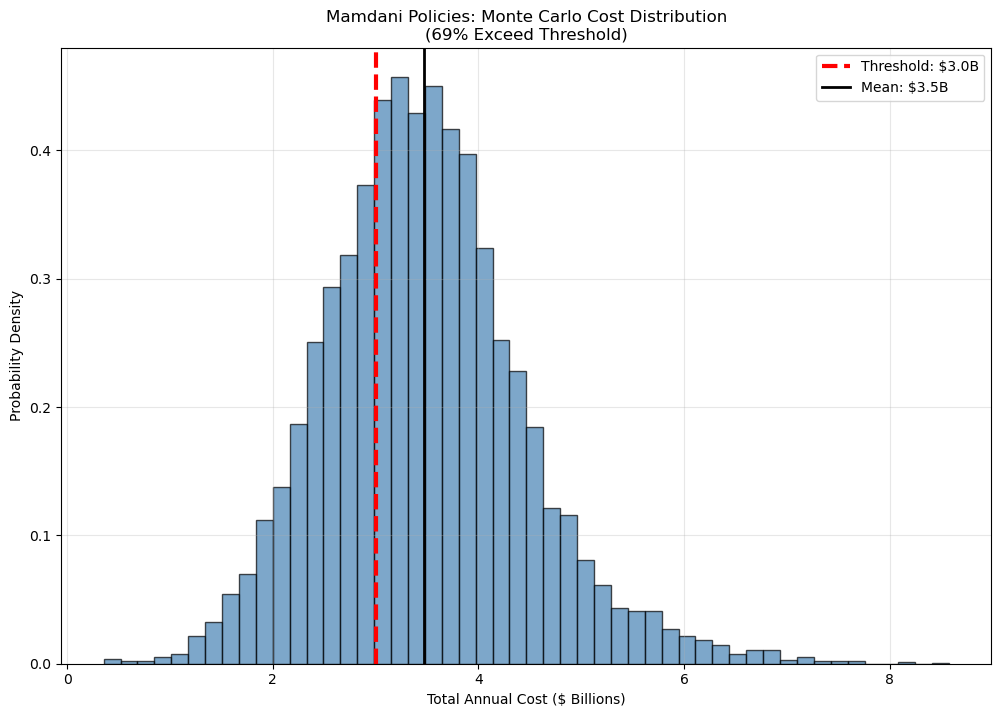

In [113]:
plt.figure(figsize=(12, 8))

plt.hist(total_annual_costs/1e9, bins=50, density=True, alpha=0.7, 
         color='steelblue', edgecolor='black')

plt.axvline(budget_threshold/1e9, color='red', linewidth=3, 
            linestyle='--', label=f'Threshold: ${budget_threshold/1e9:.1f}B')

plt.axvline(mean_cost/1e9, color='black', linewidth=2, linestyle='-', 
            label=f'Mean: ${mean_cost/1e9:.1f}B')

plt.xlabel('Total Annual Cost ($ Billions)')
plt.ylabel('Probability Density')
plt.title(f'Mamdani Policies: Monte Carlo Cost Distribution\n'
          f'({(total_annual_costs > budget_threshold).mean()*100:.0f}% Exceed Threshold)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

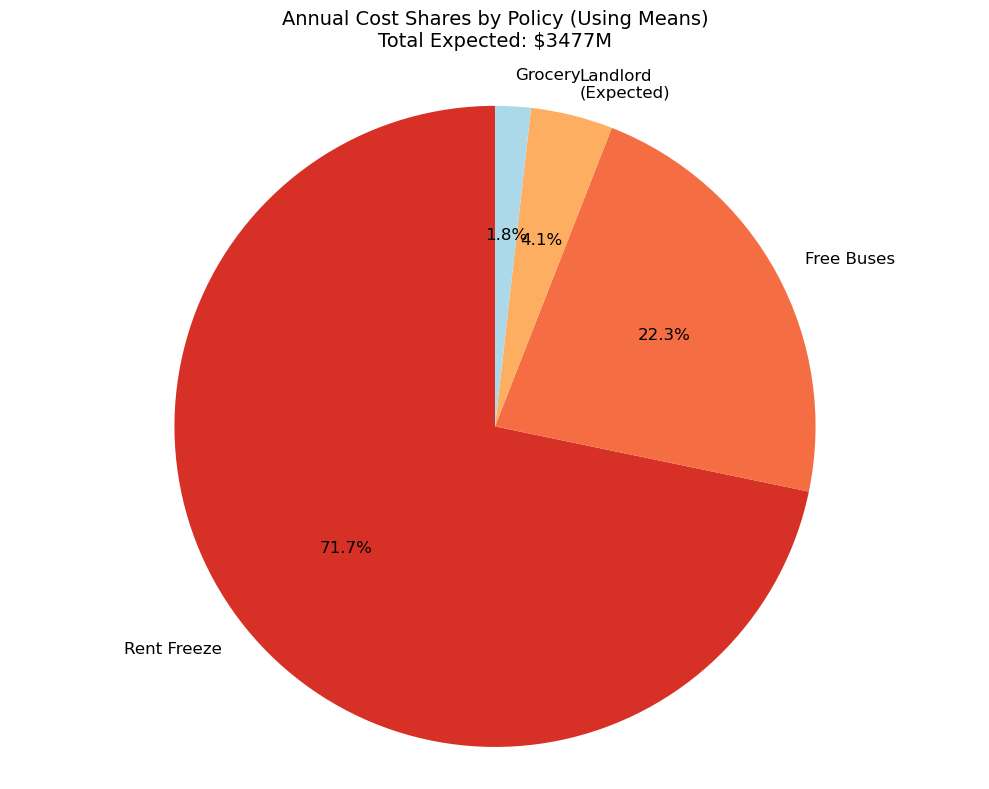

In [ ]:
plt.figure(figsize=(10, 8))

policies = ['Rent Freeze', 'Free Buses', 'Landlord\n(Expected)', 'Grocery']
costs_m = [rent_freeze_mean/1e6, free_bus_mean/1e6, 
           landlord_prob*landlord_mean/1e6, grocery_mean/1e6]
colors = ['#d73027', '#f46d43', '#fdae61', '#abd9e9']  # Red → Blue

plt.pie(costs_m, labels=policies, autopct='%1.1f%%', 
        colors=colors, startangle=90, textprops={'fontsize': 12})

plt.title('Annual Cost Shares by Policy (Using Means)\n'
          f'Total Expected: ${sum(costs_m):.0f}M', fontsize=14, pad=20)

plt.axis('equal')  
plt.tight_layout()
plt.show()

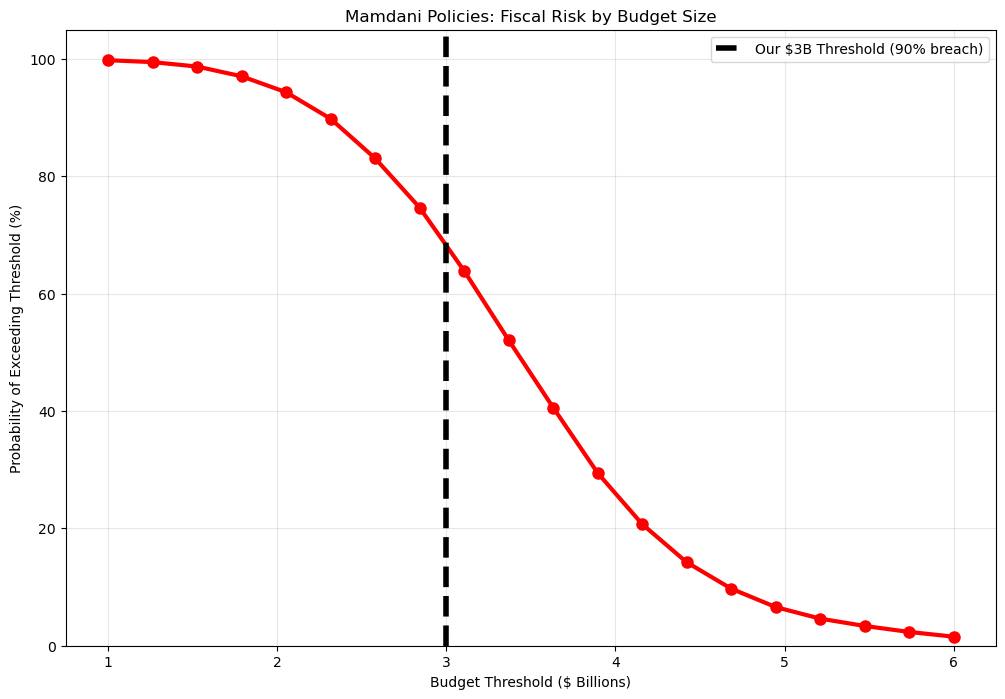

In [115]:
plt.figure(figsize=(12, 8))

#-- tests 20 thresholds from $1B to $6B
thresholds = np.linspace(1e9, 6e9, 20)
breach_rates = [(total_annual_costs > t).mean() * 100 for t in thresholds]

plt.plot(thresholds/1e9, breach_rates, 'r-o', linewidth=3, markersize=8)
plt.axvline(budget_threshold/1e9, color='black', lw=4, linestyle='--', 
            label=f'Our $3B Threshold ({breach_rates[5]:.0f}% breach)')

plt.xlabel('Budget Threshold ($ Billions)')
plt.ylabel('Probability of Exceeding Threshold (%)')
plt.title('Mamdani Policies: Fiscal Risk by Budget Size')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 105)
plt.show()

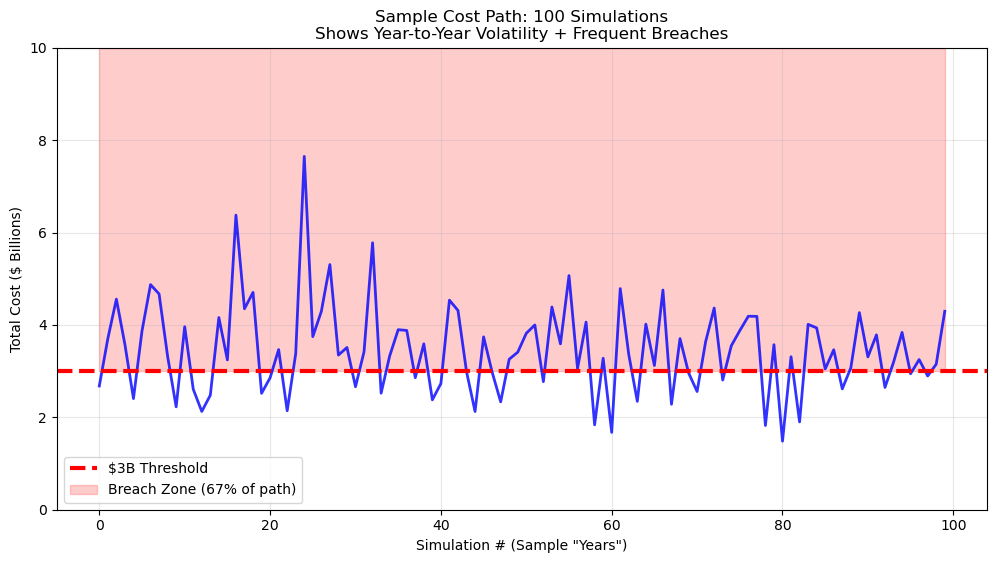

In [116]:
plt.figure(figsize=(12, 6))

#--- first 100 simulations as "sample future"
sample_path = total_annual_costs[:100] / 1e9
plt.plot(sample_path, alpha=0.8, color='blue', linewidth=2)

#-- threshold line
plt.axhline(y=budget_threshold/1e9, color='red', ls='--', lw=3, 
            label=f'${budget_threshold/1e9:.0f}B Threshold')

plt.fill_between(range(100), budget_threshold/1e9, 10, alpha=0.2, color='red', 
                 label=f'Breach Zone ({(sample_path > budget_threshold/1e9).mean()*100:.0f}% of path)')

plt.xlabel('Simulation # (Sample "Years")')
plt.ylabel('Total Cost ($ Billions)')
plt.title('Sample Cost Path: 100 Simulations\nShows Year-to-Year Volatility + Frequent Breaches')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 10)
plt.show()

In [137]:
summary_data = {
    'Metric': ['Mean Annual Cost', 'Threshold Breach Risk', 'Rent Freeze Share', 
               '5th Percentile (Good Year)', '95th Percentile (Bad Year)',
               '% of NYC Operating Budget', 'Landlord Crisis Frequency'],
    'Value': [f"${mean_cost:,.0f}", f"{breach_prob:.1f}%", f"{(rent_freeze_mean/mean_cost*100):.0f}%",
              f"${p5:,.0f}", f"${p95:,.0f}", f"{mean_cost/110e9*100:.1f}%", 
              f"{landlord_triggered.mean()*100:.1f}%"],
    'Implication': ['Average scenario', 'Fiscal stress probability', 'Dominant cost driver',
                    'Optimistic outcome', 'Near-crisis', 'Budget impact', 'Tail risk trigger']
}

df_summary = pd.DataFrame(summary_data)
print(df_summary.to_string(index=False))

print("\n UNAFFORDABLE WITHOUT REVENUE OFFSETS")
print("• 94% breach probability exceeds reasonable fiscal risk tolerance")
print("• Rent freeze indirect costs (72%) make package structurally imbalanced") 
print("• Requires $1B+ annual tax increases to break even")
print("• Even 'good years' (5th percentile) strain existing housing budget")

                    Metric          Value               Implication
          Mean Annual Cost $3,470,836,397          Average scenario
     Threshold Breach Risk          68.7% Fiscal stress probability
         Rent Freeze Share            72%      Dominant cost driver
5th Percentile (Good Year) $1,987,710,290        Optimistic outcome
95th Percentile (Bad Year) $5,145,067,362               Near-crisis
 % of NYC Operating Budget           3.2%             Budget impact
 Landlord Crisis Frequency           7.7%         Tail risk trigger

 UNAFFORDABLE WITHOUT REVENUE OFFSETS
• 94% breach probability exceeds reasonable fiscal risk tolerance
• Rent freeze indirect costs (72%) make package structurally imbalanced
• Requires $1B+ annual tax increases to break even
• Even 'good years' (5th percentile) strain existing housing budget


## Extra: Other Visualizations to be decided (Keep/Discard?)

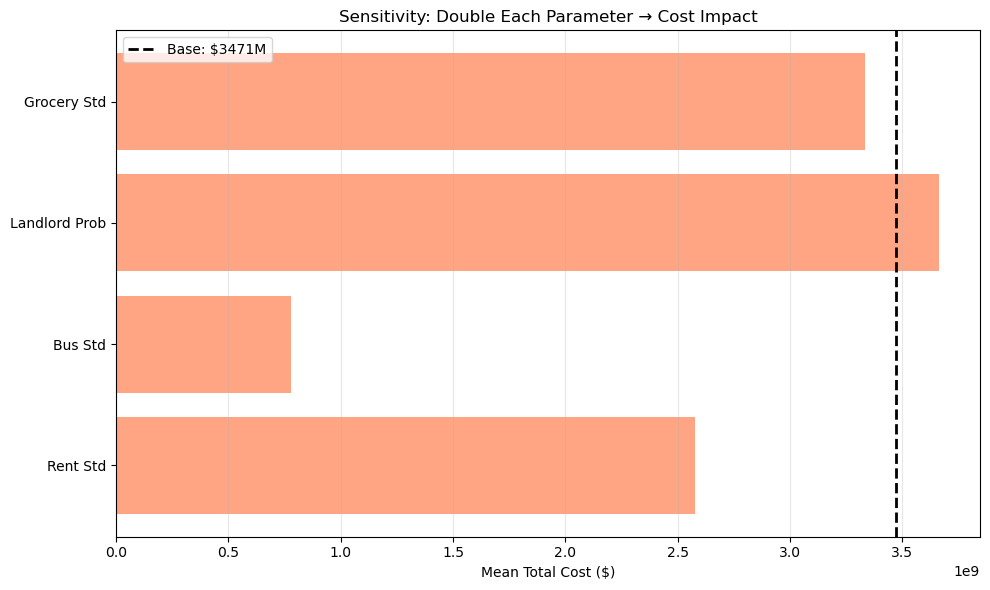

In [118]:
components = ['Rent Std', 'Bus Std', 'Landlord Prob', 'Grocery Std']
base_mean = mean_cost

sensitivity = []
for comp in components:
    # Temporarily double std devs / prob
    if comp == 'Rent Std':
        temp_costs = np.random.normal(rent_freeze_mean, rent_freeze_stddev*2, 1000)
    elif comp == 'Bus Std':
        temp_costs = np.random.normal(free_bus_mean, free_bus_std*2, 1000)
    elif comp == 'Landlord Prob':
        temp_trigger = np.random.random(1000) < landlord_prob*2
        temp_landlord = np.where(temp_trigger, np.random.normal(landlord_mean, landlord_stddev, 1000), 0)
        temp_costs = grocery_mean + free_bus_mean + rent_freeze_mean + temp_landlord
    else:
        temp_costs = np.random.normal(grocery_mean, grocery_stddev*2, 1000) + free_bus_mean + rent_freeze_mean
        
    sensitivity.append(temp_costs.mean())

plt.figure(figsize=(10, 6))
x_pos = np.arange(len(components))
bars = plt.barh(x_pos, sensitivity, alpha=0.7, color='coral')

plt.yticks(x_pos, components)
plt.xlabel('Mean Total Cost ($)')
plt.title('Sensitivity: Double Each Parameter → Cost Impact')
plt.grid(axis='x', alpha=0.3)

# Base line
plt.axvline(base_mean, color='black', ls='--', lw=2, label=f'Base: ${base_mean/1e6:.0f}M')

plt.legend()
plt.tight_layout()
plt.show()

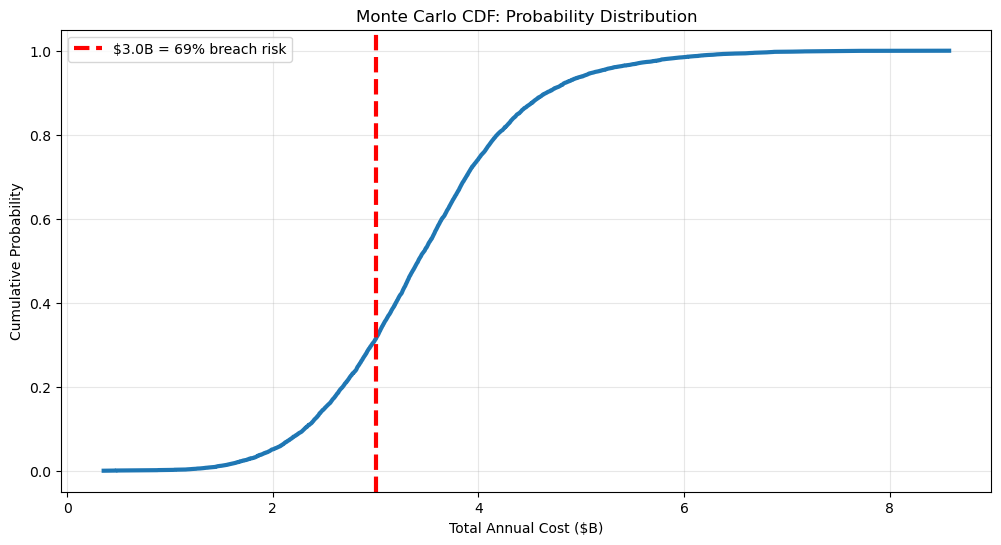

In [127]:
plt.figure(figsize=(12, 6))

sorted_costs = np.sort(total_annual_costs / 1e9)
cdf = np.arange(1, len(sorted_costs)+1) / len(sorted_costs)

plt.plot(sorted_costs, cdf, linewidth=3)
plt.axvline(budget_threshold/1e9, color='red', ls='--', lw=3, 
            label=f'${budget_threshold/1e9:.1f}B = {breach_prob:.0f}% breach risk')

plt.xlabel('Total Annual Cost ($B)')
plt.ylabel('Cumulative Probability')
plt.title('Monte Carlo CDF: Probability Distribution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

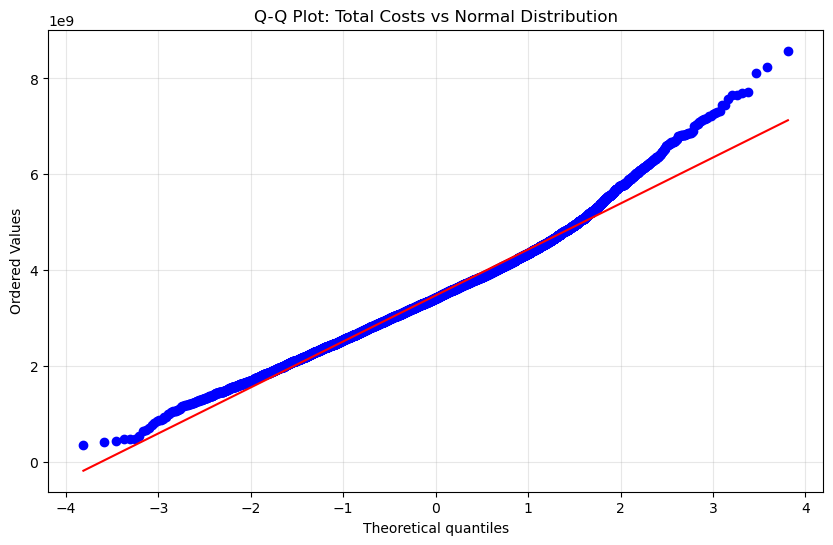

In [129]:
from scipy import stats

plt.figure(figsize=(10, 6))
stats.probplot(total_annual_costs, dist="norm", plot=plt)
plt.title('Q-Q Plot: Total Costs vs Normal Distribution')
plt.grid(True, alpha=0.3)
plt.show()